In [1]:
import numpy as np
import matplotlib.pyplot as plt
import audacity

import FluteTransients as ftr

%matplotlib notebook

In [2]:
%store -r

flatHF, flatLL, pointHF, pointLL, flatEL, pointEL;

In [3]:
# %store -r

# flatTrans, pointTrans

<IPython.core.display.Javascript object>


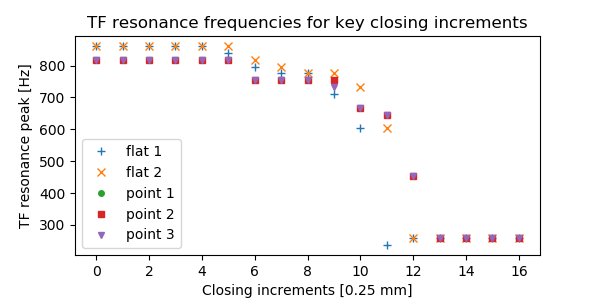

In [4]:
# Plotting resonance vs key displacement
RUNS = 17
fig = plt.figure(figsize=((6, 3)))
flat_fmts = ['+', 'x']
pt_fmts = ['o', 's', 'v']

HFdata_full = []
for acqno, acqdata in enumerate(flatHF):
    fdiff = pointHF[0][-1]-flatHF[0][-1]
    HFdata_full.append([i+fdiff for i in acqdata])
    plt.plot(np.arange(RUNS), HFdata_full[acqno], 
             str(flat_fmts[acqno]), ms=6, label='flat %d' %(acqno+1))
    
for acqno, acqdata in enumerate(pointHF):
    HFdata_full.append(acqdata)
    plt.plot(np.arange(RUNS), acqdata, 
             str(pt_fmts[acqno]), ms=4, label='point %d' %(acqno+1))
    
plt.title('TF resonance frequencies for key closing increments')
plt.xlabel('Closing increments [0.25 mm]')
plt.ylabel('TF resonance peak [Hz]')
plt.legend(loc='lower left')
plt.subplots_adjust(bottom=0.15)

# plt.savefig('TF-compareHF.png')

In [5]:
mean_HFdata = np.mean(HFdata_full, axis=0)
stdevs_HFdata = ftr.get_stdevs(HFdata_full, mean_HFdata)

<IPython.core.display.Javascript object>


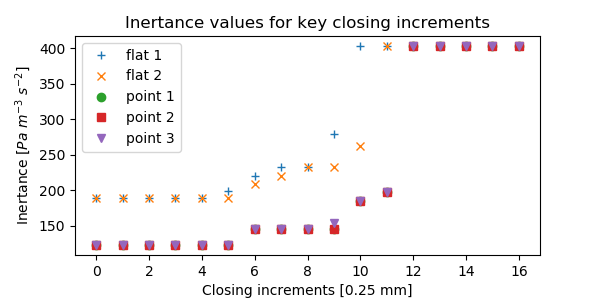

In [6]:
# Plotting inertance vs key displacement
RUNS = 17
fig = plt.figure(figsize=((6, 3)))
flat_fmts = ['+', 'x']
pt_fmts = ['o', 's', 'v']

LLdata_full = []
for acqno, acqdata in enumerate(flatLL):
    ldiff = flatLL[0][-1]-pointLL[0][-1]
    LLdata_full.append([i-ldiff for i in acqdata])
    plt.plot(np.arange(RUNS), LLdata_full[acqno], 
             str(flat_fmts[acqno]), label='flat %d' %(acqno+1))
    
for acqno, acqdata in enumerate(pointLL):
    LLdata_full.append(acqdata)
    plt.plot(np.arange(RUNS), acqdata, 
             str(pt_fmts[acqno]), label='point %d' %(acqno+1))
    
plt.title('Inertance values for key closing increments')
plt.xlabel('Closing increments [0.25 mm]')
plt.ylabel('Inertance [$Pa$ $m^{-3}$ $s^{-2}$]')
plt.legend(loc='upper left')
plt.subplots_adjust(bottom=0.15)

# plt.savefig('TF-compareLL.png')

In [7]:
mean_LLdata = np.mean(LLdata_full, axis=0)
stdevs_LLdata = ftr.get_stdevs(LLdata_full, mean_LLdata)

<IPython.core.display.Javascript object>


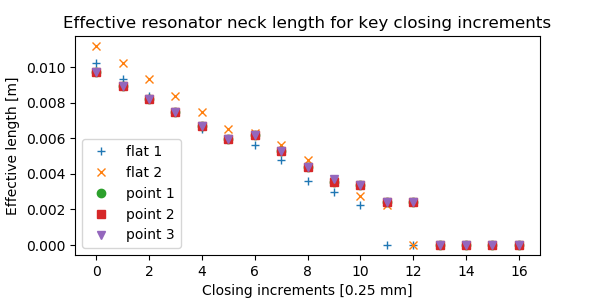

In [8]:
# Plotting effective length vs key displacement
RUNS = 17
fig = plt.figure(figsize=((6, 3)))
flat_fmts = ['+', 'x']
pt_fmts = ['o', 's', 'v']

ELdata_full = []
for acqno, acqdata in enumerate(flatEL):
    ldiff = pointEL[0][-1]-flatEL[0][-1]
    ELdata_full.append([i+ldiff for i in acqdata])
    plt.plot(np.arange(RUNS), acqdata, 
             str(flat_fmts[acqno]), label='flat %d' %(acqno+1))
    
for acqno, acqdata in enumerate(pointEL):
    ELdata_full.append(acqdata)
    plt.plot(np.arange(RUNS), acqdata, 
             str(pt_fmts[acqno]), label='point %d' %(acqno+1))
    
plt.title('Effective resonator neck length for key closing increments')
plt.xlabel('Closing increments [0.25 mm]')
plt.ylabel('Effective length [m]')
plt.legend(loc='lower left')
plt.subplots_adjust(bottom=0.15)

# plt.savefig('TF-compareLL.png')

In [9]:
mean_ELdata = np.mean(ELdata_full, axis=0)
stdevs_ELdata = ftr.get_stdevs(ELdata_full, mean_ELdata)

In [24]:
import tabulate

efflen_mm = [i*1000 for i in mean_ELdata]
efflenerr_mm = [i*1000 for i in stdevs_ELdata]

incr_col = np.arange(RUNS)
rfreq_col = mean_HFdata.tolist()
rfreq_err = stdevs_HFdata.tolist()
inert_col = mean_LLdata.tolist()
inert_err = stdevs_LLdata.tolist()
efflen_col = efflen_mm
efflen_err = efflenerr_mm

table_data = np.array([incr_col,rfreq_col,rfreq_err,
                        inert_col,inert_err,efflen_col,efflen_err])
table_data = table_data.T.tolist()

headers = ["Aperture increment", "Resonance", "Res. error", "Inertance",
          "Inert. error", "Effective length", "Eff. l. error"]

print(tabulate.tabulate(table_data, tablefmt='latex_raw', floatfmt=('.0f','.2f','.2f','.2f','.2f','.2f','.2f')))

# tf_point_table = tabulate.tabulate(table_data, headers, tablefmt='latex_raw', floatfmt='.2f')
# np.savetxt('TFpoint-table.txt', ['%s' %tf_point_table], fmt='%s')

\begin{tabular}{rrrrrrr}
\hline
  0 & 835.49 &  23.59 & 149.63 &  36.40 & 10.11 & 0.65 \\
  1 & 835.49 &  23.59 & 149.63 &  36.40 &  9.29 & 0.56 \\
  2 & 835.49 &  23.59 & 149.63 &  36.40 &  8.47 & 0.48 \\
  3 & 835.49 &  23.59 & 149.63 &  36.40 &  7.65 & 0.42 \\
  4 & 835.49 &  23.59 & 149.63 &  36.40 &  6.83 & 0.36 \\
  5 & 831.18 &  19.26 & 151.52 &  39.13 &  6.07 & 0.25 \\
  6 & 775.20 &  30.45 & 173.03 &  38.53 &  6.08 & 0.27 \\
  7 & 766.58 &  19.26 & 177.81 &  45.08 &  5.25 & 0.29 \\
  8 & 762.28 &  11.79 & 180.31 &  48.29 &  4.32 & 0.44 \\
  9 & 745.05 &  24.55 & 191.31 &  61.71 &  3.46 & 0.30 \\
 10 & 667.53 &  45.68 & 244.00 &  94.96 &  3.01 & 0.51 \\
 11 & 555.56 & 179.13 & 279.61 & 112.55 &  1.88 & 1.05 \\
 12 & 374.68 & 106.15 & 402.90 &   0.00 &  1.47 & 1.34 \\
 13 & 258.40 &   0.00 & 402.90 &   0.00 &  0.00 & 0.00 \\
 14 & 258.40 &   0.00 & 402.90 &   0.00 &  0.00 & 0.00 \\
 15 & 258.40 &   0.00 & 402.90 &   0.00 &  0.00 & 0.00 \\
 16 & 258.40 &   0.00 & 402.90 &   0.00 